In [2]:
# Binomial distribution inference: Coin flip.
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import sympy as sy

## Binomial Distribution

$$ {N \choose k} \theta^k(1-\theta)^{N-k}= \frac {\Gamma(N+1)} {\Gamma(k+1)\Gamma(N-k+1)} \theta^k(1-\theta)^{N-k}$$


> 이항 분포 (N,k,p)에서, theta의 값이 고정, 모든 k에 대해서 결과의 합이 1.
> 그런데 베이지안 통계학에서는, 데이터가 고정, theta가 변해야 하기 때문에 확률이 아니라고 했던거 같은데.

In [3]:
def Binomial(N,k):
    def BinomialDistribution(theta):
        return math.comb(N,k)*theta**k*(1-theta)**(N-k)
    
    return BinomialDistribution

def BinomialSy(N,k):
    BinomialDistribution = Binomial(N,k)

    x = np.linspace(0,1,101)

    points = np.array([[t, BinomialDistribution(t)] for t in x])

    plt.plot(points[:,0],points[:,1])

    theta = sy.symbols('theta')
    binomialFormula =sy.factorial(N)/sy.factorial(k)/sy.factorial(N-k)*theta**k*(1-theta)**(N-k)
    I = sy.Integral(binomialFormula,(theta,0,1))
    print(sy.pretty(I))
    print('\n값:',sy.integrate(binomialFormula,(theta,0,1)).evalf())
    

1                   
⌠                   
⎮      4        6   
⎮ 210⋅θ ⋅(1 - θ)  dθ
⌡                   
0                   

값: 0.0909090909090909


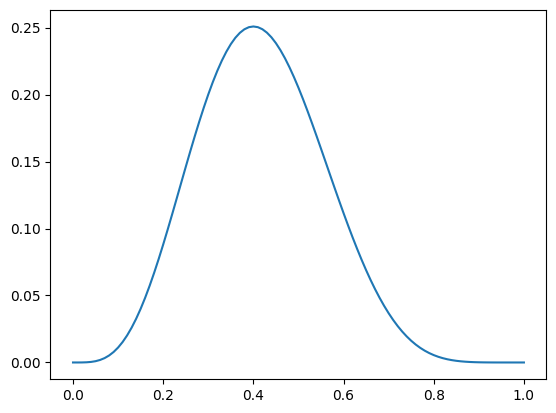

In [4]:
BinomialSy(10,4)

In [5]:
theta = 0.4
N = 12
total = 0
for k in range(N+1):
    BinomialDistribution = Binomial(N,k)
    total += BinomialDistribution(theta)
total

1.0

In [62]:
epochs = 2000000
N_trial = 50

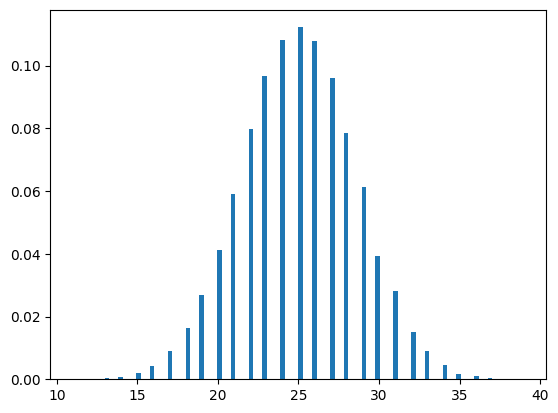

In [72]:
num_heads = 0
num_heads_arr = []

for epoch in range(epochs):
    isHead = random.randint(0,1)
    if isHead:
        num_heads += 1
    
    if epoch % N_trial == 0 and epoch != 0:
        num_heads_arr.append(num_heads)
        num_heads = 0
    
num_heads_arr = np.array(num_heads_arr,dtype=np.float64)
plt.hist(num_heads_arr,bins=100,weights=np.ones_like(num_heads_arr)/ len(num_heads_arr))
plt.show()

In [64]:
k = np.arange(0,50,1)

y = [math.comb(N_trial,k_)*math.pow(0.5, N_trial) for k_ in k]

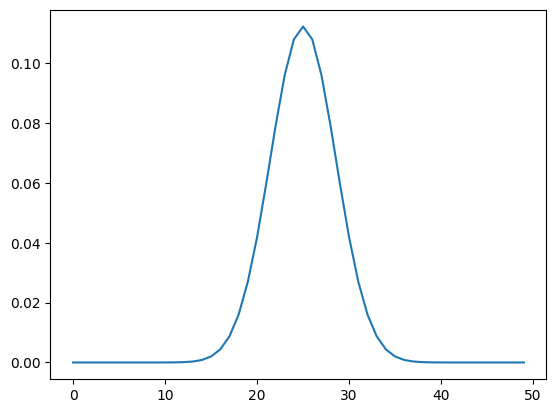

In [65]:
plt.plot(k,y)